# Lab 6: Minimization

In [4]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as spl

## Exercise 1

### Part 1
Code the newton method for N-dimension

In [5]:
#newton method

def newtonmethod(GradientF, HessianF, x0, itmax, tolerance):
    for i in range (itmax):
        x1 = x0 - spl.solve((HessianF(x0)),GradientF(x0))
        if spl.norm(GradientF(x1)) < (tolerance):
            break
        x0 = x1 
    return x1 , i

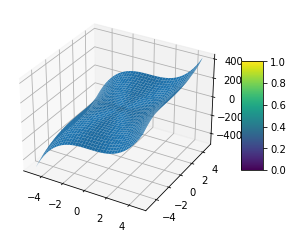

In [6]:

#practice plotting!


fig,ax = plt.subplots(subplot_kw={"projection":"3d"})
x = np.arange(-5,5,0.25)
y = np.arange(-5,5,0.25)
x, y = np. meshgrid(x,y)
z = (3*x**3)+(y**3)

graph = ax.plot_surface(x, y, z)
fig.colorbar(graph, shrink=0.5, aspect=5)
plt.show()

### Part 2

Test your Newton's method

In [7]:
x0 = np.array([1])

# F(X) = 3x^5 - 4x^3 + 5

def GradientF(x):
    return np.array([ 15*x[0]**4 - 12*x[0]**2])
def HessianF(x):
    return np.array([60*x[0]**3 - 24*x[0]]) 

newton, iteration = newtonmethod(GradientF, HessianF, x0, 50, 10E-5)
print ('min: ', newton)

print( '\nGradient: ', spl.norm(GradientF(newton)) ,',', 'iteration: ', iteration)

min:  [0.89443171]

Gradient:  9.70229826631197e-05 , iteration:  2


## Exercise 2


### Part 1
Code the gradient descent method

In [8]:
#gradient descent method 

def GradientDescent(GradientF, a, x0, itmax, tolerance):
    for i in range (itmax):
        x1 = x0 - a*(GradientF(x0))
        if spl.norm(GradientF(x1)) < (tolerance):
            break
        x0 = x1
    return x1,i

### Part 2

Test your gradient descent method

In [9]:
def GradientF(x):
    return np.array([ 15*x[0]**4 - 12*x[0]**2])

x0 = np.array([1])

descent, iteration = GradientDescent(GradientF, 0.01, x0, 50, 10E-5)
print('min: ',descent)

print( '\nGradient: ', spl.norm(GradientF(descent)) ,',', 'iteration: ', iteration)


min:  [0.89443091]

Gradient:  7.988570433070663e-05 , iteration:  40


## Exercise 3

minimize using both method 

$$f(x)=2x^4 − 3x^2 + 4$$

In [10]:
#minimizing using newtons method: 


x0 = np.array([1])

 
def GradientF(x):
    return np.array([ 8*x[0]**3 - 6*x[0]])
def HessianF(x):
    return np.array([24*x[0]**2 - 6]) 

newton, iteration = newtonmethod(GradientF, HessianF, x0, 50, 10E-5)
print ('min: ',newton)

print( '\nGradient: ', spl.norm(GradientF(newton)) ,',', 'iteration: ', iteration)

min:  [0.86602666]

Gradient:  1.5085001848547108e-05 , iteration:  2


In [11]:
#minimizing using the gradient descent method: 

def GradientF(x):
    return np.array([ 8*x[0]**3 - 6*x[0]])

x0 = np.array([1])

descent, iteration = GradientDescent(GradientF, 0.01, x0, 50, 10E-5)
print('min: ',descent)

print( '\nGradient: ', spl.norm(GradientF(descent)) ,',', 'iteration: ', iteration)


min:  [0.86620153]

Gradient:  0.002114149020086664 , iteration:  49


## Exercise 4

 Minimize the function below using both method
$$D(x_1,x_2)=x_2^4+x_1x_2+(1+x_1)^2$$

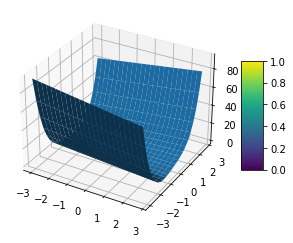

In [13]:
#plotting the graph 


fig,ax = plt.subplots(subplot_kw={"projection":"3d"})
x = np.arange(-3,3,0.25)
y = np.arange(-3,3,0.25)
x, y = np. meshgrid(x,y)
z = y**4 + x*y + (1+y)**2

surf = ax.plot_surface(x, y, z)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [14]:
#minimizing using the newton method 


x0 = np.array([-2,2])
tolerance = 1e-16

def GradientF(x):
    return np.array([x[1] + 2 + 2*x[0], 4*x[1]**3 + x[0]])

def HessianF(x):
    return np.array([[2,1],[1, 12*x[1]**2]])


                     
newton, iteration = newtonmethod(GradientF, HessianF, x0, 50, tolerance)
print ('min: ',newton)

print( '\nGradient: ', spl.norm(GradientF(newton)) ,',', 'iteration: ', iteration)

min:  [-1.34794219  0.69588439]

Gradient:  0.0 , iteration:  7


In [15]:
#minimizing using the gradient descent method:

def GradientF(x):
    return np.array([4*x[0] - x[1], -x[0] + 8*x[1] - 3])

x0 = np.array([1,1])

descent, iteration = GradientDescent(GradientF, 0.01, x0, 50, 10E-5)
print('min: ',descent)

print( '\nGradient: ', spl.norm(GradientF(descent)) ,',', 'iteration: ', iteration)



min:  [0.24132802 0.42665773]

Gradient:  0.5654288193691 , iteration:  49


## Exercise 5

Minimize the function
$$ f(x_1,x_2) = (1-x_2)^2+100(x_1-x_2^2)^2$$

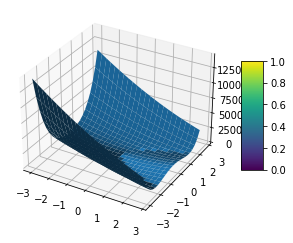

In [16]:
#plotting the graph 


fig,ax = plt.subplots(subplot_kw={"projection":"3d"})
x = np.arange(-3,3,0.25)
y = np.arange(-3,3,0.25)
x, y = np. meshgrid(x,y)
z = ((1 - y)**2) + 100*(x-(y**2))**2

graph = ax.plot_surface(x, y, z)
fig.colorbar(graph, shrink=0.5, aspect=5)
plt.show()

In [17]:
#minimizing using the newton method 


x0 = np.array([-1,2])


def GradientF(x):
    return np.array([200*x[0] - (200*(x[1]**2)), 400*x[1] * (-x[0] + x[1]**2) + 2*x[1] - 2])

def HessianF(x):
    return np.array([[200, -400*x[1]], [-400*x[1], -400*x[0] + 1200*x[1]**2 + 2]])


                     
newton, iteration = newtonmethod(GradientF, HessianF, x0, 50, tolerance)
print ('min: ',newton)

print( '\nGradient: ', spl.norm(GradientF(newton)) ,',', 'iteration: ', iteration)

min:  [1. 1.]

Gradient:  0.0 , iteration:  7


## Exercise 6


Minimize the function
$$ f(x,y) = x^2–4xy+5y^2−4y+3$$

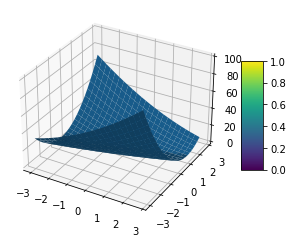

In [18]:
#plotting the graph 


fig,ax = plt.subplots(subplot_kw={"projection":"3d"})
x = np.arange(-3,3,0.25)
y = np.arange(-3,3,0.25)
x, y = np. meshgrid(x,y)
z = x**2 - 4*x*y + 5*y**2 - 4*y + 3

surf = ax.plot_surface(x, y, z)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [22]:
#minimizing using the newton method 


x0 = np.array([1,3])


def GradientF(x):
    return np.array([(2*x[0]) - (4*x[1]), -4*x[0] + 10*x[1] - 4])

def HessianF(x):
    return np.array([[2, -4], [-4, 10]])


                     
newton, iteration = newtonmethod(GradientF, HessianF, x0, 50, 10e-16)
print ('min: ',newton)

print( '\nGradient: ', spl.norm(GradientF(newton)) ,',', 'iteration: ', iteration)

min:  [4. 2.]

Gradient:  0.0 , iteration:  0
